import pandas เพื่อวิเคราะห์ข้อมูลสถิติ

In [710]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# เลือกฟอนต์ที่รองรับภาษาไทย เช่น TH Sarabun
plt.rcParams['font.family'] = ''


In [711]:
#copy path ของไฟล์data index.csv แล้วเอามาวาง
coff = pd.read_csv("/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/coffee_sale.csv")

ข้อมูลสรุปเชิงสถิติและการกระจายตัวของข้อมูล
1.ยอดขายในแต่ละเดือนที่ขายกาแฟได้
2.ในแต่ละเดือนกาแฟในแต่ละเดื่อน
3.ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ
3.ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
4.หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
5.จำนวนลูกค้าในแต่ละวัน

In [712]:
coff.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [713]:
coff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1749 non-null   object 
 1   datetime     1749 non-null   object 
 2   cash_type    1749 non-null   object 
 3   card         1660 non-null   object 
 4   money        1749 non-null   float64
 5   coffee_name  1749 non-null   object 
dtypes: float64(1), object(5)
memory usage: 82.1+ KB


เตรียมข้อมูล

In [714]:
coff['month'] = coff['date'].apply(lambda x : x.split('-')[1])
coff['day'] = coff['date'].apply(lambda x : x.split('-')[2])
coff['hour'] = coff['datetime'].apply(lambda x : x.split(' ')[1][:2])
#ค่าเงินจากยูเครนฮรีฟเนีย (UAH) 25 ก.ย. 17:02 UTC 1uah = 0.79 บาท
#1 USD = 41.42  UAH
coff['money_THB'] = coff['money']*0.79

def get_time_period(hour):
    if '07' <= hour < '12':
        return 'Morning'
    elif '12' <= hour < '18':
        return 'Afternoon'
    else:
        return 'Evening'

coff['time_period'] = coff['hour'].apply(get_time_period)
coff['date'] = pd.to_datetime(coff['date'])

time_period_order = ['Morning', 'Afternoon', 'Evening']
coff['time_period'] = pd.Categorical(coff['time_period'], categories=time_period_order, ordered=True)

# สร้างคอลัมน์ 'day_of_week' ที่เก็บชื่อวันในสัปดาห์
coff['day_of_week'] = coff['date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
coff['day_of_week'] = pd.Categorical(coff['day_of_week'], categories=days_order, ordered=True)
coff.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,03,01,10,30.573,Morning,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,03,01,13,22.831,Afternoon,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,03,01,13,30.573,Afternoon,Friday


In [715]:
# โหลดข้อมูลจากไฟล์ Excel
dataTemp = pd.read_excel('/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/export.xlsx')

# แสดงข้อมูลเบื้องต้น
dataTemp.info()

# ตรวจสอบชื่อคอลัมน์ใน dataTemp
print("Columns in dataTemp DataFrame:", dataTemp.columns)

# ตรวจสอบชื่อคอลัมน์ใน coff2
print("Columns in coff2 DataFrame:", coff.columns)

# แปลงคอลัมน์วันที่ในทั้งสอง DataFrame เป็น datetime
dataTemp['date'] = pd.to_datetime(dataTemp['date'])
coff['date'] = pd.to_datetime(coff['date'])

# รวมข้อมูล
coff = pd.merge(coff, dataTemp[['date', 'tavg']], on='date', how='left')

# เปลี่ยนชื่อคอลัมน์ tavg เป็น temperature
coff.rename(columns={'tavg': 'temperature'}, inplace=True)

# แสดงผลลัพธ์
print(coff.tail(50))  # แสดงผล 50 แถวสุดท้าย

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    214 non-null    object 
 1   tavg    214 non-null    float64
 2   tmin    214 non-null    float64
 3   tmax    214 non-null    float64
 4   prcp    206 non-null    float64
 5   snow    2 non-null      float64
 6   wdir    214 non-null    int64  
 7   wspd    214 non-null    float64
 8   wpgt    0 non-null      float64
 9   pres    214 non-null    float64
 10  tsun    0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB
Columns in dataTemp DataFrame: Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')
Columns in coff2 DataFrame: Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'month', 'day', 'hour', 'money_THB', 'time_period', 'day_of_week'],
      dtype='object'

In [716]:
coff

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,03,01,10,30.5730,Morning,Friday,4.7
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,03,01,13,22.8310,Afternoon,Friday,4.7
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,03,01,13,30.5730,Afternoon,Friday,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,2024-09-30,2024-09-30 19:53:14.092,card,ANON-0000-0000-0694,25.96,Americano with Milk,09,30,19,20.5084,Evening,Monday,12.5
1745,2024-09-30,2024-09-30 19:54:17.620,card,ANON-0000-0000-0631,35.76,Cortado,09,30,19,28.2504,Evening,Monday,12.5
1746,2024-09-30,2024-09-30 19:59:18.993,card,ANON-0000-0000-0531,30.86,Latte,09,30,19,24.3794,Evening,Monday,12.5
1747,2024-09-30,2024-09-30 20:00:42.135,card,ANON-0000-0000-0633,30.86,Americano with Milk,09,30,20,24.3794,Evening,Monday,12.5


In [717]:
coff.describe()

,date,money,money_THB,temperature
count,1749,1749.000000,1749.000000,1749.000000
mean,2024-06-25 09:49:30.154374144,31.510212,24.893067,17.950886
min,2024-03-01 00:00:00,18.120000,14.314800,-1.300000
25%,2024-05-09 00:00:00,27.920000,22.056800,15.700000
50%,2024-06-26 00:00:00,32.820000,25.927800,19.900000
75%,2024-08-17 00:00:00,37.720000,29.798800,22.200000
max,2024-09-30 00:00:00,40.000000,31.600000,29.600000
std,NaN,5.330878,4.211394,6.681016


หาค่ากลางหรือค่ามัธยฐาน ค่าความแปรปรวน และค่าฐานนิยม

In [718]:
mode = coff['money'].mode().iloc[0]
var = coff['money'].var()
med = coff['money'].median()

print(f"ฐานนิยม: {mode}")
print(f"ค่าความแปรปรวน: {var}")
print(f"ค่ามัธยฐาน: {med}")

ฐานนิยม: 32.82
ค่าความแปรปรวน: 28.418261110827636
ค่ามัธยฐาน: 32.82


In [719]:
print(f"จำนวนแถวของข้อมูล : {coff.shape[0]}")
print(f"จำนวนแถวของข้อมูล : {coff.shape[1]}")

จำนวนแถวของข้อมูล : 1749
จำนวนแถวของข้อมูล : 13


การกระจายตัวของข้อมูลนี้ (สร้างตารางควอไทล์)

In [720]:
Q1 = coff['money_THB'].quantile(0.25)
Q3 = coff['money_THB'].quantile(0.75)
#หา Q1 Q3 ด้วย เปอร์เซ็นพาย
IQR = Q3 - Q1

print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")
print(f"ค่าเฉลี่ยของข้อมูล : {coff['money_THB'].mean()}")

# Define outlier range
lower_bound = Q1 - 1.5 * IQR # ถ้าน้อยกว่าค่านี้จะเป็นค่าผิดปกติ
upper_bound = Q3 + 1.5 * IQR # ถ้ามากกว่าจะเป็นค่าผิดปกติ

print(f"lower_bound : {lower_bound}")
print(f"upper_bound : {upper_bound}")
coff2 = coff[(coff['money_THB'] >= lower_bound) & (coff['money_THB'] <= upper_bound)] # ลบ data ที่ผิดปกติออกทั้งแถว!

Q1 : 22.056800000000003
Q3 : 29.7988
IQR : 7.741999999999997
ค่าเฉลี่ยของข้อมูล : 24.8930671240709
lower_bound : 10.443800000000007
upper_bound : 41.4118


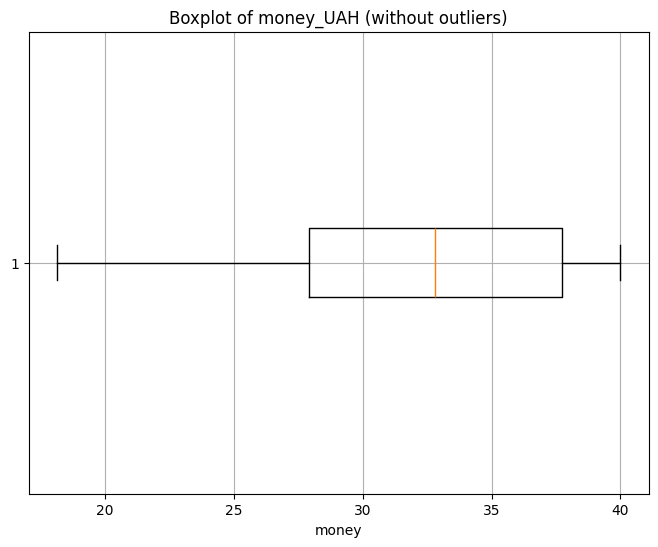

In [721]:
# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(coff2['money'], vert=False)
plt.title('Boxplot of money_UAH (without outliers)')
plt.xlabel('money')
plt.grid(True)
plt.show()

จากการตรวจสอบการกระจายของข้อมูล พบว่ามีข้อมูลที่ผิดปกติอยู่หนึ่งค่าที่ไม่สามารถอธิบายได้ว่าเกิดจากอะไร เราได้ทำการเช็ควันที่ขายกาแฟวันนั้นแล้วก็มีค่ากาแฟชนิดนี้ซึ่งไม่เกิน30สิบ แล้วก็ดูค่าเฉลี่ยของกาแฟชนิดก็ไม่เกิน 30 เช่นกัน จากนั้นเราก็ได้ตรวจสอบการใข้บัตรของลูกค้าคนนี้ก็พบว่าการที่ลูกค่ามาซื้อของวันอื่นก็ไม่ได้มีค่าที่ผิดปกติอะไร เราจึงทำการดรอปข้อมูลนี้ทิ้งไป

In [722]:
ans2 = coff[(coff['money_THB'] <= lower_bound) | (coff['money_THB'] >= upper_bound)]
print(ans2)

Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name, month, day, hour, money_THB, time_period, day_of_week, temperature]
Index: []


In [723]:
coffee_mean = coff2.groupby(['coffee_name'])['money'].mean()
coffee_max = coff2.groupby(['coffee_name'])['money'].max()
coffee_min = coff2.groupby(['coffee_name'])['money'].min()
print("---------mean----------")
print(coffee_mean)
print("----------max----------")
print(coffee_max)
print("----------min----------")
print(coffee_min)

---------mean----------
coffee_name
Americano              26.262857
Americano with Milk    30.544865
Cappuccino             36.124502
Cocoa                  35.372364
Cortado                25.952444
Espresso               20.956533
Hot Chocolate          36.567033
Latte                  35.425013
Name: money, dtype: float64
----------max----------
coffee_name
Americano              35.76
Americano with Milk    35.76
Cappuccino             40.00
Cocoa                  40.00
Cortado                35.76
Espresso               25.00
Hot Chocolate          40.00
Latte                  40.00
Name: money, dtype: float64
----------min----------
coffee_name
Americano              23.02
Americano with Milk    25.96
Cappuccino             23.02
Cocoa                  25.96
Cortado                23.02
Espresso               18.12
Hot Chocolate          25.96
Latte                  25.96
Name: money, dtype: float64


จำนวนการขายกาแฟในแต่ละครั้ง และยอดขาย (สร้างกราฟให้หน่อย)

In [724]:
value1 = coff2.groupby(['coffee_name']).size().sort_values()
value2 = coff2.groupby(['coffee_name'])['money'].sum().sort_values()
value3 = coff2.groupby(['coffee_name'])['money'].mean().sort_values()
print('จำนวนกาแฟที่ขายไป')
print(value1)
print('ยอดขายกาแฟ')
print(value2)
print('ราคาเฉลี่ยของกาแฟ')
print(value3)

จำนวนกาแฟที่ขายไป
coffee_name
Cocoa                   55
Espresso                75
Hot Chocolate           91
Cortado                180
Americano              238
Cappuccino             271
Latte                  395
Americano with Milk    444
dtype: int64
ยอดขายกาแฟ
coffee_name
Espresso                1571.74
Cocoa                   1945.48
Hot Chocolate           3327.60
Cortado                 4671.44
Americano               6250.56
Cappuccino              9789.74
Americano with Milk    13561.92
Latte                  13992.88
Name: money, dtype: float64
ราคาเฉลี่ยของกาแฟ
coffee_name
Espresso               20.956533
Cortado                25.952444
Americano              26.262857
Americano with Milk    30.544865
Cocoa                  35.372364
Latte                  35.425013
Cappuccino             36.124502
Hot Chocolate          36.567033
Name: money, dtype: float64


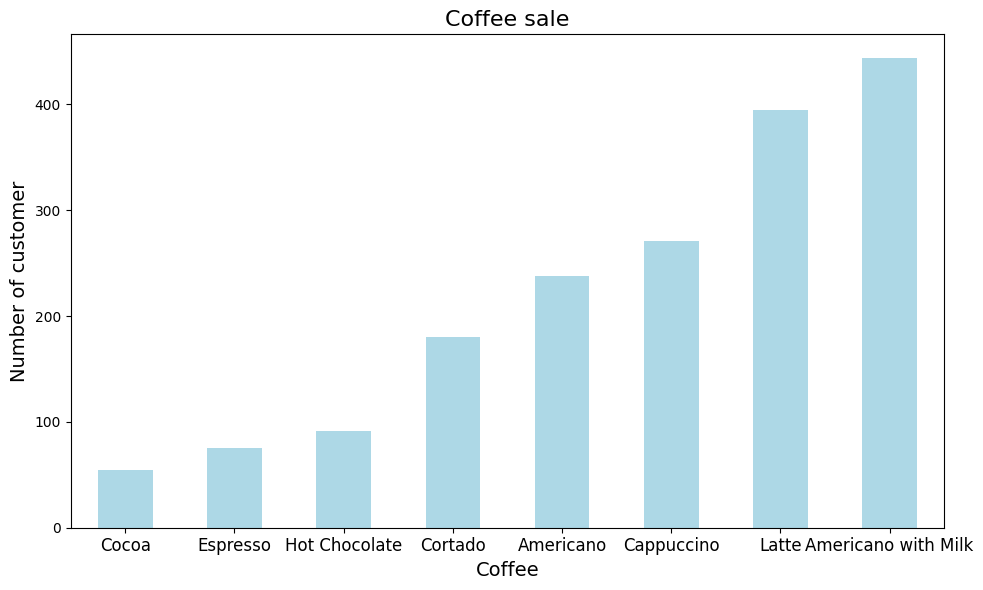

In [725]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value1.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Coffee sale', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Number of customer', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

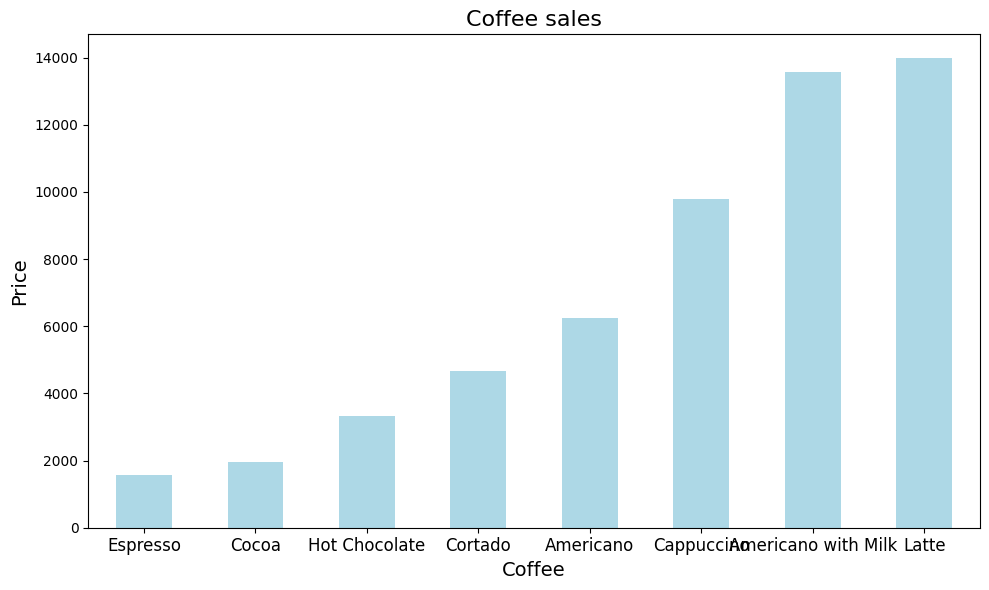

In [726]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value2.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Coffee sales', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

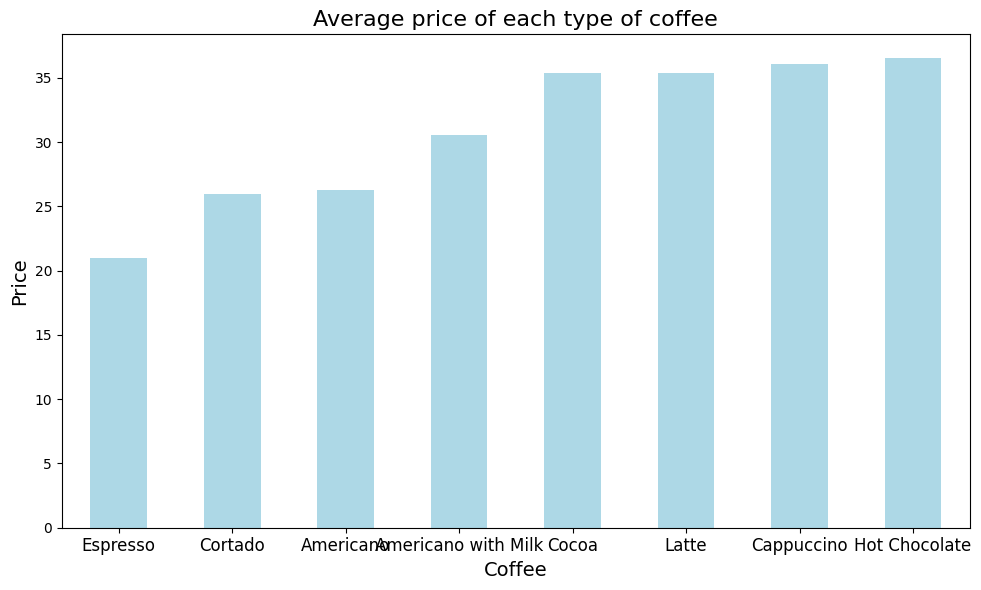

In [727]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value3.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Average price of each type of coffee', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

จำนวนลูกค้าในแต่ละเดือน ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [728]:
ans = coff2['month'].value_counts().sort_index()
print(ans)

month
03    206
04    196
05    267
06    227
07    237
08    272
09    344
Name: count, dtype: int64


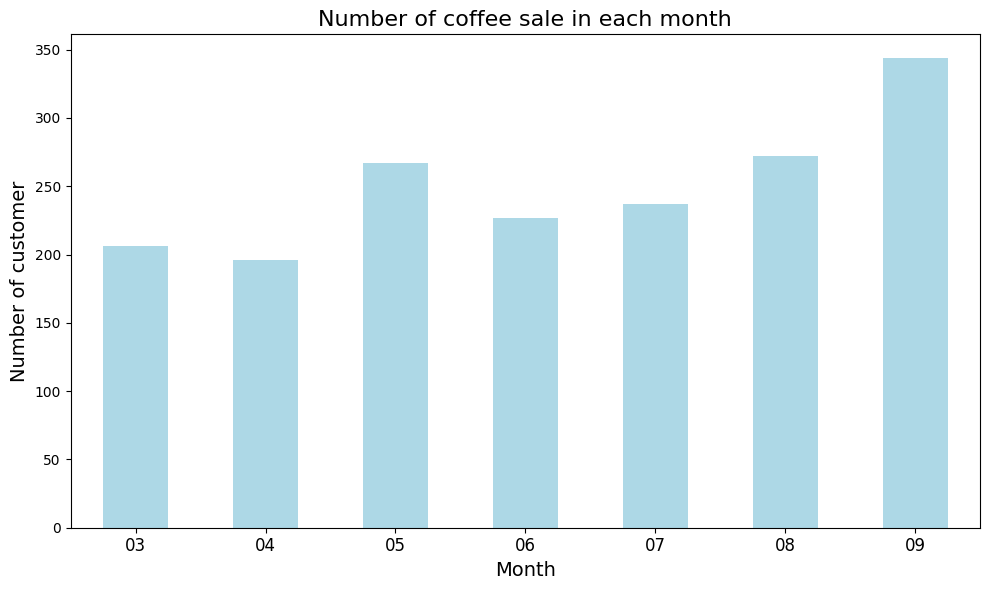

In [729]:
# สร้างกราฟแท่ง
ans.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffee sale in each month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of customer', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

ยอดขายในแต่ละเดือนที่ขายกาแฟได้ ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [730]:
value = coff2.groupby(coff2['month'])['money'].sum().sort_index()
value


month
03    7050.20
04    6720.56
05    9063.42
06    7758.76
07    6915.94
08    7613.84
09    9988.64
Name: money, dtype: float64

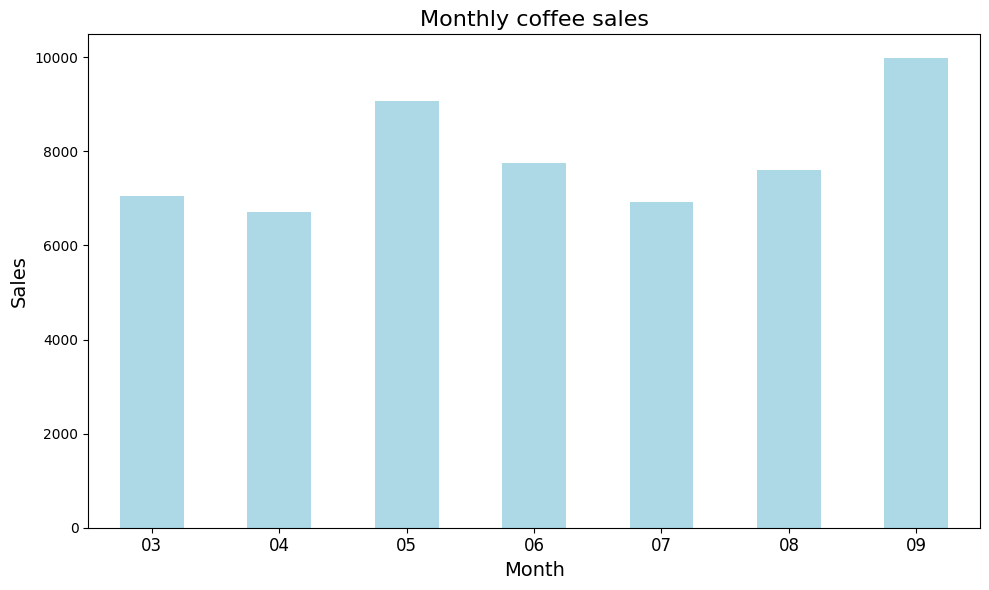

In [731]:
# สร้างกราฟแท่ง
value.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Monthly coffee sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

ยอดขายกาแฟในแต่ละเดือน (สร้างกราฟให้หน่อย)

In [732]:
value = coff2.groupby(['month','coffee_name']).size().unstack()
value

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
month,,,,,,,,
03,36,34,20,6,30,10,22,48
04,35,42,43,6,19,7,13,31
05,48,58,55,9,17,8,14,58
06,14,69,46,5,19,10,14,50
07,36,65,32,9,14,14,11,56
08,37,72,34,11,40,14,6,58
09,32,104,41,9,41,12,11,94


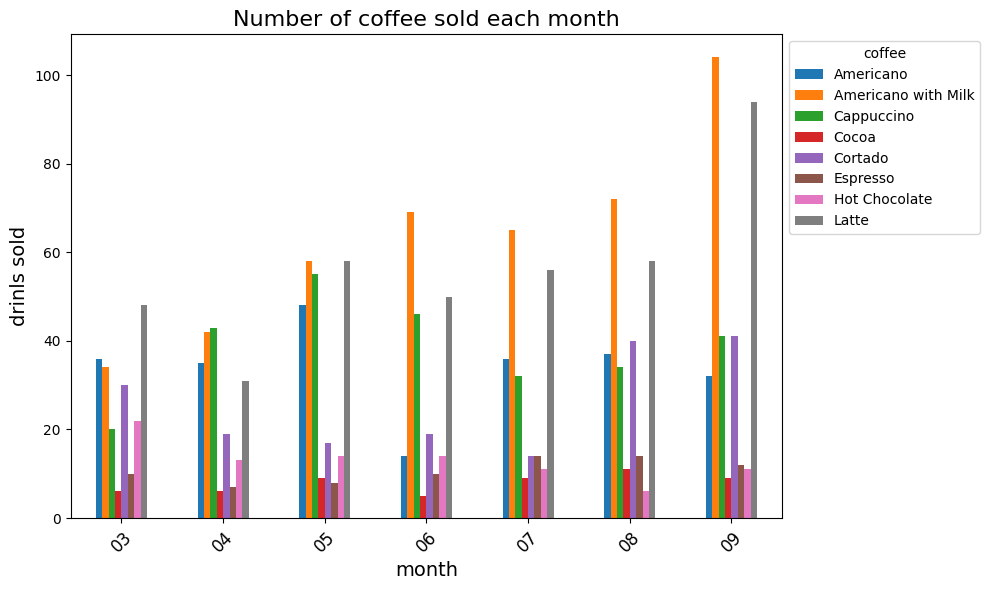

In [733]:
value.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffee sold each month', fontsize=16)
plt.xlabel('month', fontsize=14)
plt.ylabel('drinls sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='coffee', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

จะวิเคราะห์จำนวนแก้วที่ขายได้ว่ามีผลว่าจากอะไรบ้าง

In [734]:
temp = coff2.groupby('month')['temperature'].mean()
combined_df = pd.merge(value, temp, on='month')
combined_df

,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,temperature
month,,,,,,,,,
03,36,34,20,6,30,10,22,48,4.200000
04,35,42,43,6,19,7,13,31,12.662245
05,48,58,55,9,17,8,14,58,17.092509
06,14,69,46,5,19,10,14,50,21.426872
07,36,65,32,9,14,14,11,56,22.878903
08,37,72,34,11,40,14,6,58,22.580515
09,32,104,41,9,41,12,11,94,20.515407


จากผลการวิเคราะห์ความสัมพันธ์ (correlation) ที่คุณได้แสดงมา จะเห็นได้ว่ามีความสัมพันธ์ระหว่างยอดขายกาแฟและอุณหภูมิในบางระดับ โดยตัวเลขที่ได้จะอยู่ในช่วง -1 ถึง 1 โดยที่:

ค่าใกล้เคียง 1 แสดงว่ามีความสัมพันธ์เชิงบวกสูง (เมื่อหนึ่งเพิ่ม อีกหนึ่งก็เพิ่มตาม)
ค่าใกล้เคียง -1 แสดงว่ามีความสัมพันธ์เชิงลบสูง (เมื่อหนึ่งเพิ่ม อีกหนึ่งจะลดลง)
ค่าใกล้เคียง 0 แสดงว่ามีความสัมพันธ์ต่ำ หรือไม่มีความสัมพันธ์กัน

                     Americano  Americano with Milk  Cappuccino     Cocoa  \
Americano             1.000000            -0.230906    0.024815  0.576594   
Americano with Milk  -0.230906             1.000000    0.294779  0.492305   
Cappuccino            0.024815             0.294779    1.000000  0.031845   
Cocoa                 0.576594             0.492305    0.031845  1.000000   
Cortado               0.004379             0.489408   -0.333898  0.423639   
Espresso             -0.089523             0.523921   -0.466087  0.627347   
Hot Chocolate        -0.030597            -0.620067   -0.315886 -0.707981   
Latte                 0.031909             0.879023    0.084686  0.520529   
temperature          -0.230280             0.744061    0.427498  0.529541   

                      Cortado  Espresso  Hot Chocolate     Latte  temperature  
Americano            0.004379 -0.089523      -0.030597  0.031909    -0.230280  
Americano with Milk  0.489408  0.523921      -0.620067  0.879023     

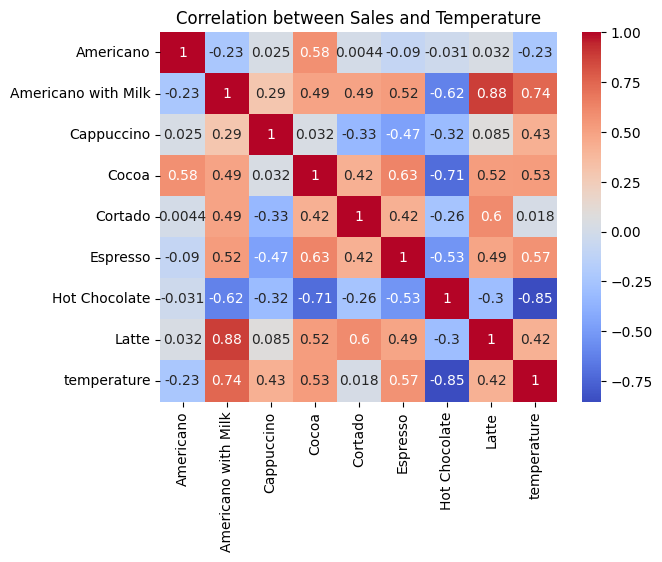

In [735]:
# การตรวจสอบความสัมพันธ์
correlation = combined_df.corr()
print(correlation)

# การสร้างกราฟ
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Temperature')
plt.show()


สร้างการดูยอดขายในแต่ละเดือนแยกตามกาแฟแต่ละชนิด ก็จะเห็นว่ายอดขายในมีนามียอดขายลาเต้ที่สูงที่สุด แล้วตามด้วยอเมริกาโน้แล้วก็อเมริกาโนใส่นมซึ่ง ซึ่งเดือนต่อมาก็มีคาปูชีโน่และAmericano with Milk ซึ่งมียอดขายพอๆกัน และในเดือนพฤษภาคมมียอดขายAmericano with Milk กับลาเต้ที่มียอดขายพอๆกัน และเดือนมิถุนายน กรกฏาตม สิงหาคม และกันยายน ยอดขายของ Americano with Milk ขายดีที่สุดและก็ลองลงมาเป็นลาเต้ และในส่วนของโกโก้ ช๊อคโกแลตร้อน เป็นเมนูหวานซึ่งคนนิยมกินน้อยเพราะไม่ใช่กาแฟ แต่ก็จะกลุ่มลูกค้าที่ชอบกินรสชาติหวานแล้ว
ก็ไม่กินกาแฟเข้ม ซึ่งจากข้อมูลจะเห็นว่าสามอันดับแรกส่วนใหญ่จะเป็น Americano with Milk ลาเต้ แล้วก็ Cappuccino แล้วถ้าดูจากความสัมพันธ์ของยอดขายกาแฟ ก็จะเห็นว่า 
จากตารางค่าสหสัมพันธ์ที่คุณให้มา นี่คือการตีความเกี่ยวกับยอดขายของเครื่องดื่มกาแฟแต่ละชนิดกับอุณหภูมิ:

1. **Americano (-0.230)**:  
   ความสัมพันธ์เชิงลบเล็กน้อย แสดงว่าถ้าอุณหภูมิสูงขึ้น ยอดขาย Americano มีแนวโน้มที่จะลดลง แต่ไม่ชัดเจนมากนักเพราะค่าสหสัมพันธ์อยู่ในระดับเล็กน้อย (-0.230)

2. **Americano with Milk (0.744)**:  
   มีความสัมพันธ์เชิงบวกสูงมาก แสดงว่าถ้าอุณหภูมิสูงขึ้น ยอดขาย Americano with Milk จะเพิ่มขึ้นอย่างชัดเจน

3. **Cappuccino (0.427)**:  
   มีความสัมพันธ์เชิงบวกปานกลาง แสดงว่าถ้าอุณหภูมิสูงขึ้น ยอดขาย Cappuccino มีแนวโน้มที่จะเพิ่มขึ้น

4. **Cocoa (0.530)**:  
   มีความสัมพันธ์เชิงบวกปานกลาง แสดงว่าถ้าอุณหภูมิสูงขึ้น ยอดขาย Cocoa มีแนวโน้มที่จะเพิ่มขึ้น

5. **Cortado (0.018)**:  
   แทบไม่มีความสัมพันธ์กับอุณหภูมิ (0.018) แสดงว่าอุณหภูมิไม่ส่งผลต่อยอดขาย Cortado

6. **Espresso (0.568)**:  
   มีความสัมพันธ์เชิงบวกปานกลาง แสดงว่าถ้าอุณหภูมิสูงขึ้น ยอดขาย Espresso มีแนวโน้มที่จะเพิ่มขึ้น

7. **Hot Chocolate (-0.852)**:  
   มีความสัมพันธ์เชิงลบอย่างมาก แสดงว่าถ้าอุณหภูมิสูงขึ้น ยอดขาย Hot Chocolate จะลดลงอย่างชัดเจน

8. **Latte (0.421)**:  
   มีความสัมพันธ์เชิงบวกปานกลาง แสดงว่าถ้าอุณหภูมิสูงขึ้น ยอดขาย Latte มีแนวโน้มที่จะเพิ่มขึ้น

### การสรุป:
- เครื่องดื่มประเภทที่มีค่าสหสัมพันธ์เชิงบวกกับอุณหภูมิสูง เช่น **Americano with Milk** และ **Cappuccino** จะมียอดขายเพิ่มขึ้นเมื่ออุณหภูมิสูงขึ้น
- ในทางกลับกัน เครื่องดื่มอย่าง **Hot Chocolate** ซึ่งมีค่าสหสัมพันธ์เชิงลบสูงมาก จะมียอดขายลดลงอย่างมากเมื่ออุณหภูมิสูงขึ้น

การวิเคราะห์นี้แสดงให้เห็นว่าประเภทของกาแฟและอุณหภูมิของแต่ละวันมีผลต่อยอดขายของเครื่องดื่ม

จากตารางค่าสหสัมพันธ์ที่คุณให้มา นี่คือการตีความความสัมพันธ์ระหว่างกาแฟแต่ละชนิด:

1. **Americano**:
   - ความสัมพันธ์สูงสุดกับ **Cocoa (0.577)** แสดงว่าถ้ายอดขาย Americano เพิ่มขึ้น ยอดขาย Cocoa ก็มีแนวโน้มที่จะเพิ่มขึ้นเช่นกัน
   - ความสัมพันธ์ต่ำมากหรือแทบไม่มีความสัมพันธ์กับ **Cortado (0.004)**

2. **Americano with Milk**:
   - มีความสัมพันธ์สูงมากกับ **Latte (0.879)** แสดงว่าถ้ายอดขาย Americano with Milk เพิ่มขึ้น ยอดขาย Latte ก็เพิ่มขึ้นตามไปด้วยอย่างมาก
   - มีความสัมพันธ์เชิงลบกับ **Hot Chocolate (-0.620)** แสดงว่าถ้ายอดขาย Americano with Milk เพิ่มขึ้น ยอดขาย Hot Chocolate มีแนวโน้มลดลง

3. **Cappuccino**:
   - มีความสัมพันธ์ปานกลางกับ **Americano with Milk (0.295)** แสดงว่าถ้ายอดขาย Cappuccino เพิ่มขึ้น ยอดขาย Americano with Milk ก็มีแนวโน้มเพิ่มขึ้นเช่นกัน
   - มีความสัมพันธ์เชิงลบค่อนข้างสูงกับ **Cortado (-0.334)** แสดงว่าถ้ายอดขาย Cappuccino เพิ่มขึ้น ยอดขาย Cortado มีแนวโน้มลดลง

4. **Cocoa**:
   - มีความสัมพันธ์สูงกับ **Espresso (0.627)** แสดงว่าถ้ายอดขาย Cocoa เพิ่มขึ้น ยอดขาย Espresso ก็มีแนวโน้มเพิ่มขึ้นเช่นกัน
   - มีความสัมพันธ์เชิงลบสูงกับ **Hot Chocolate (-0.708)** แสดงว่าถ้ายอดขาย Cocoa เพิ่มขึ้น ยอดขาย Hot Chocolate จะลดลงอย่างมาก

5. **Cortado**:
   - มีความสัมพันธ์ปานกลางกับ **Latte (0.596)** แสดงว่าถ้ายอดขาย Cortado เพิ่มขึ้น ยอดขาย Latte ก็มีแนวโน้มเพิ่มขึ้น
   - มีความสัมพันธ์ต่ำมากกับ **Americano (0.004)** ซึ่งแทบไม่มีความสัมพันธ์ระหว่างยอดขายของทั้งสอง

6. **Espresso**:
   - มีความสัมพันธ์สูงกับ **Cocoa (0.627)** แสดงว่าถ้ายอดขาย Espresso เพิ่มขึ้น ยอดขาย Cocoa ก็มีแนวโน้มเพิ่มขึ้นเช่นกัน
   - มีความสัมพันธ์เชิงลบสูงกับ **Hot Chocolate (-0.527)** แสดงว่าถ้ายอดขาย Espresso เพิ่มขึ้น ยอดขาย Hot Chocolate มีแนวโน้มลดลง

7. **Hot Chocolate**:
   - มีความสัมพันธ์เชิงลบกับหลายชนิดของกาแฟ เช่น **Americano with Milk (-0.620)** และ **Cocoa (-0.708)** แสดงว่าถ้ายอดขายกาแฟเพิ่มขึ้น ยอดขาย Hot Chocolate มักจะลดลง

8. **Latte**:
   - มีความสัมพันธ์สูงมากกับ **Americano with Milk (0.879)** และ **Cortado (0.596)** แสดงว่ายอดขายของเครื่องดื่มทั้งสามชนิดมีแนวโน้มที่จะเปลี่ยนแปลงในทิศทางเดียวกัน
   - มีความสัมพันธ์เชิงลบเล็กน้อยกับ **Hot Chocolate (-0.301)**

### สรุป:
- **Latte** และ **Americano with Milk** มีความสัมพันธ์เชิงบวกสูงมาก หมายความว่าทั้งสองประเภทมักจะขายได้ดีในเวลาเดียวกัน
- **Hot Chocolate** มักจะมีความสัมพันธ์เชิงลบกับหลายชนิด โดยเฉพาะกับกาแฟประเภทอื่นๆ แสดงว่าเมื่อขายกาแฟดีขึ้น ยอดขาย Hot Chocolate มักจะลดลง
- **Espresso** และ **Cocoa** มีความสัมพันธ์เชิงบวกสูง แสดงว่ายอดขายของทั้งสองประเภทนี้มักจะเพิ่มขึ้นพร้อมกัน

การวิเคราะห์นี้สามารถช่วยให้คุณเข้าใจแนวโน้มการขายของกาแฟแต่ละประเภทและการจัดการสต็อกให้เหมาะสมกับความต้องการของลูกค้า

In [736]:
day_week_count = coff2.groupby(['day_of_week']).size()
day_week_count

/tmp/ipykernel_1145/2539387812.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_week_count = coff2.groupby(['day_of_week']).size()


day_of_week
Monday       251
Tuesday      285
Wednesday    231
Thursday     249
Friday       237
Saturday     251
Sunday       245
dtype: int64

ยอดขายกาแฟแต่ละชนิดในแต่ละสัปดาห์

In [737]:
day_week_coffee = coff2.groupby(['day_of_week','coffee_name']).size().unstack()
day_week_coffee

/tmp/ipykernel_1145/7630883.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_week_coffee = coff2.groupby(['day_of_week','coffee_name']).size().unstack()


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
day_of_week,,,,,,,,
Monday,47,65,40,7,19,6,8,59
Tuesday,32,83,37,15,30,5,21,62
Wednesday,33,55,35,7,25,15,8,53
Thursday,35,56,42,1,28,14,14,59
Friday,37,55,31,8,21,13,16,56
Saturday,26,70,39,12,28,12,8,56
Sunday,28,60,47,5,29,10,16,50


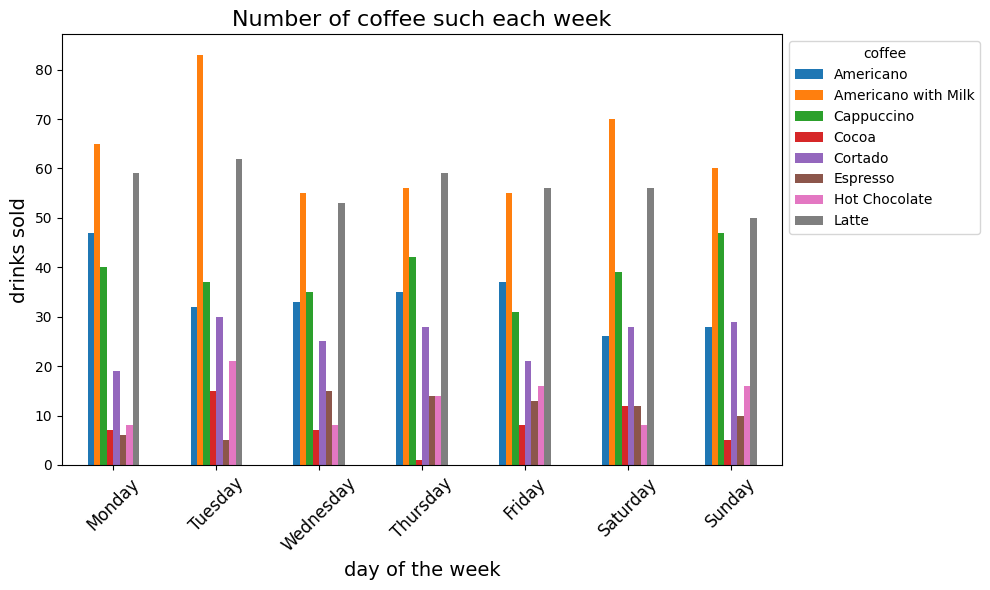

In [738]:
day_week_coffee.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffee such each week', fontsize=16)
plt.xlabel('day of the week', fontsize=14)
plt.ylabel('drinks sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='coffee', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [739]:
from scipy import stats
# ทำ ANOVA
f_statistic, p_value = stats.f_oneway(
    day_week_coffee['Americano'].dropna(),
    day_week_coffee['Americano with Milk'].dropna(),
    day_week_coffee['Cappuccino'].dropna(),
    day_week_coffee['Cocoa'].dropna(),
    day_week_coffee['Cortado'].dropna(),
    day_week_coffee['Espresso'].dropna(),
    day_week_coffee['Hot Chocolate'].dropna(),
    day_week_coffee['Latte'].dropna()
)

# แสดงผลลัพธ์
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if (p_value < 0.05) :
    print("ยอดขายกาแฟที่แตกต่างกันอย่างมีนัยสำคัญตามวันในสัปดาห์")
else :
    print("ยอดขายกาแฟที่แตกต่างกันอย่างมีนัยสำคัญตามวันในสัปดาห์")


F-statistic: 88.71280915466946
P-value: 2.9326060635615136e-25
ยอดขายกาแฟที่แตกต่างกันอย่างมีนัยสำคัญตามวันในสัปดาห์


จากการวิเคราะห์ LSD ที่คุณได้ทำไปแล้ว เราสามารถสรุปเกี่ยวกับ **ความนิยมของกาแฟแต่ละชนิด** ได้ดังนี้:

### กาแฟที่มีความแตกต่างอย่างมีนัยสำคัญ
1. **Americano และ Americano with Milk**: มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 21.14) ซึ่งบ่งชี้ว่า **Americano with Milk** น่าจะเป็นที่นิยมมากกว่า **Americano** อย่างชัดเจนในกลุ่มลูกค้าที่ต้องการกาแฟที่มีรสนุ่มนวลขึ้น
   
2. **Americano กับหลายชนิด**: Americano มีความแตกต่างอย่างมีนัยสำคัญกับ **Cocoa**, **Cortado**, **Espresso**, **Hot Chocolate**, และ **Latte** ซึ่งแสดงว่าความนิยมของ Americano แตกต่างจากเมนูเหล่านี้ชัดเจน โดย **Americano มีแนวโน้มได้รับความนิยมมากกว่า** Espresso, Hot Chocolate, และ Cortado

3. **Americano with Milk กับหลายชนิด**: Americano with Milk มีความแตกต่างกับ **Cocoa**, **Cortado**, **Espresso**, และ **Hot Chocolate** ซึ่งชี้ให้เห็นว่า Americano with Milk ได้รับความนิยมมากกว่าเครื่องดื่มเหล่านี้ และได้รับความนิยมใกล้เคียงกับ **Latte**

4. **Cappuccino กับ Cocoa**: Cappuccino มีความแตกต่างอย่างมีนัยสำคัญกับ Cocoa (mean diff = 26.86) ซึ่งหมายความว่า **Cappuccino เป็นที่นิยมมากกว่า** Cocoa ในวันปกติ และแสดงถึงกลุ่มลูกค้าที่ชอบกาแฟผสมนมมากกว่าเครื่องดื่มช็อกโกแลต

5. **Cocoa กับ Cortado**: Cocoa มีความแตกต่างจาก Cortado โดยแสดงให้เห็นว่า **Cocoa ได้รับความนิยมมากกว่า Cortado** ซึ่ง Cortado อาจเป็นเมนูที่ไม่ค่อยเป็นที่นิยมในกลุ่มลูกค้าที่ชอบเครื่องดื่มหวานและนม

6. **Latte กับหลายชนิด**: Latte มีความแตกต่างอย่างมีนัยสำคัญกับหลายเมนู เช่น **Espresso**, **Hot Chocolate**, และ **Cortado** ซึ่งบ่งชี้ว่า **Latte มีแนวโน้มได้รับความนิยมมากกว่า**เครื่องดื่มที่เข้มข้นหรือหวานน้อยกว่า

### แนวโน้มของความนิยม
- **กาแฟที่มีกลิ่นนม** (เช่น **Americano with Milk**, **Cappuccino**, และ **Latte**) ดูเหมือนจะได้รับความนิยมมากกว่า **กาแฟที่เข้มข้น** (เช่น **Espresso** และ **Cortado**) และ **เครื่องดื่มที่มีส่วนผสมของช็อกโกแลต** (เช่น **Hot Chocolate** และ **Cocoa**)
  
- เมนูที่มี **ความแตกต่างน้อย** (เช่น Americano กับ Cappuccino) อาจหมายความว่ากลุ่มลูกค้าที่ดื่มกาแฟเข้มชอบทั้งสองแบบใกล้เคียงกัน ซึ่งอาจเป็นโอกาสในการทำการตลาดเฉพาะกลุ่ม

- **วันในสัปดาห์**: วันทำงานอาจเป็นช่วงที่เครื่องดื่มที่เข้มข้นหรือมีส่วนผสมของนม เช่น Americano with Milk หรือ Latte เป็นที่นิยมมากกว่า ในขณะที่เครื่องดื่มเบาๆ อย่าง Cocoa อาจขายดีในวันหยุด

### การปรับกลยุทธ์
- เพิ่มการโปรโมตเมนูที่ได้รับความนิยมน้อยกว่า (เช่น **Espresso** และ **Cortado**) โดยใช้ข้อได้เปรียบด้านรสชาติเฉพาะตัวที่แตกต่างจากเมนูอื่นๆ
- ส่งเสริมกาแฟที่ผสม **นมและหวาน** (เช่น **Americano with Milk** และ **Latte**) ในวันทำงานเพราะมีความนิยมสูง

การวิเคราะห์นี้สามารถช่วยให้คุณปรับกลยุทธ์การขายกาแฟได้ดีขึ้น

In [740]:
# คำนวณ MSE
# Residual Variance (สามารถได้จาก ANOVA)
# MSE = SS_residual / df_residual
# SS_residual = sum of squares of residuals (ใช้ค่า F-statistic คำนวณได้)
# df_residual = n - k (n = จำนวนข้อมูลทั้งหมด, k = จำนวนกลุ่ม)
n_total = day_week_coffee.count().sum()  # จำนวนข้อมูลทั้งหมด
k = day_week_coffee.shape[1]  # จำนวนกลุ่ม (coffee types)
df_residual = n_total - k  # degree of freedom สำหรับ residual
MSE = (f_statistic * df_residual) / (n_total - 1)

# คำนวณค่า LSD
alpha = 0.05  # ระดับความสำคัญ
t_value = stats.t.ppf(1 - alpha / 2, df_residual)  # ค่าตาราง t
n = day_week_coffee.count().min()  # ขนาดกลุ่มตัวอย่างที่น้อยที่สุด
LSD = t_value * np.sqrt((2 * MSE) / n)

print(f"MSE: {MSE}")
print(f"LSD: {LSD}")

# เปรียบเทียบค่าเฉลี่ยระหว่างกาแฟแต่ละชนิด
coffee_names = day_week_coffee.columns
for i in range(len(coffee_names)):
    for j in range(i + 1, len(coffee_names)):
        group1 = day_week_coffee[coffee_names[i]].dropna()
        group2 = day_week_coffee[coffee_names[j]].dropna()
        mean_diff = abs(np.mean(group1) - np.mean(group2))
        
        # ตรวจสอบว่าความแตกต่างมากกว่า LSD หรือไม่
        if mean_diff > LSD:
            print(f"{coffee_names[i]} และ {coffee_names[j]} มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = {mean_diff})")
        else:
            print(f"{coffee_names[i]} และ {coffee_names[j]} ไม่มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = {mean_diff})")

MSE: 77.42208798952971
LSD: 9.45652562004441
Americano และ Americano with Milk มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 29.42857142857143)
Americano และ Cappuccino ไม่มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 4.714285714285715)
Americano และ Cocoa มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 26.142857142857142)
Americano และ Cortado ไม่มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 8.285714285714285)
Americano และ Espresso มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 23.285714285714285)
Americano และ Hot Chocolate มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 21.0)
Americano และ Latte มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 22.42857142857143)
Americano with Milk และ Cappuccino มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 24.714285714285715)
Americano with Milk และ Cocoa มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 55.57142857142858)
Americano with Milk และ Cortado มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 37.714285714285715)
Americano with Milk และ Espresso มีความแตกต่างกัน

ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน เช้า (Morning): 07:00 - 12:00 บ่าย (Afternoon): 12:00 - 18:00 เย็น (Evening): 18:00 - 22:00 (สร้างกราฟให้หน่อย)

In [741]:
value = coff2.groupby('time_period')['money'].sum()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']} ")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']} ")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']}")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 17871.78 
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 20466.84 
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 16772.74


/tmp/ipykernel_1145/2607369737.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value = coff2.groupby('time_period')['money'].sum()


In [742]:
value = coff2.groupby('time_period').size()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']}")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']}")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']}")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 589
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 645
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 515


/tmp/ipykernel_1145/1120676006.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value = coff2.groupby('time_period').size()


In [743]:
# Group data by day_of_week, time_period, and coffee_name
sales_by_day_time = coff2.groupby(['day_of_week', 'time_period', 'coffee_name'], observed=False).size().reset_index(name='cups_sold')
# Display the result
sales_by_day_time


,day_of_week,time_period,coffee_name,cups_sold
0,Monday,Morning,Americano,19
1,Monday,Morning,Americano with Milk,24
2,Monday,Morning,Cappuccino,12
3,Monday,Morning,Cocoa,0
4,Monday,Morning,Cortado,13
...,...,...,...,...
163,Sunday,Evening,Cocoa,0
164,Sunday,Evening,Cortado,3
165,Sunday,Evening,Espresso,1
166,Sunday,Evening,Hot Chocolate,9


/tmp/ipykernel_1145/2368188135.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


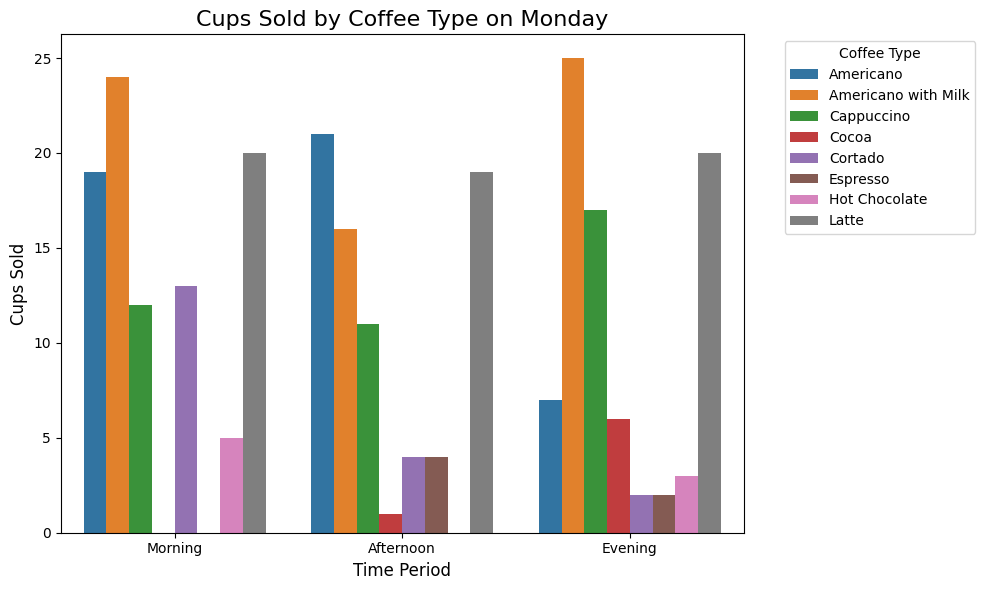

In [744]:
import seaborn as sns
import matplotlib.pyplot as plt

monday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Monday']

monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
monday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=monday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Monday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()


/tmp/ipykernel_1145/2019334488.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


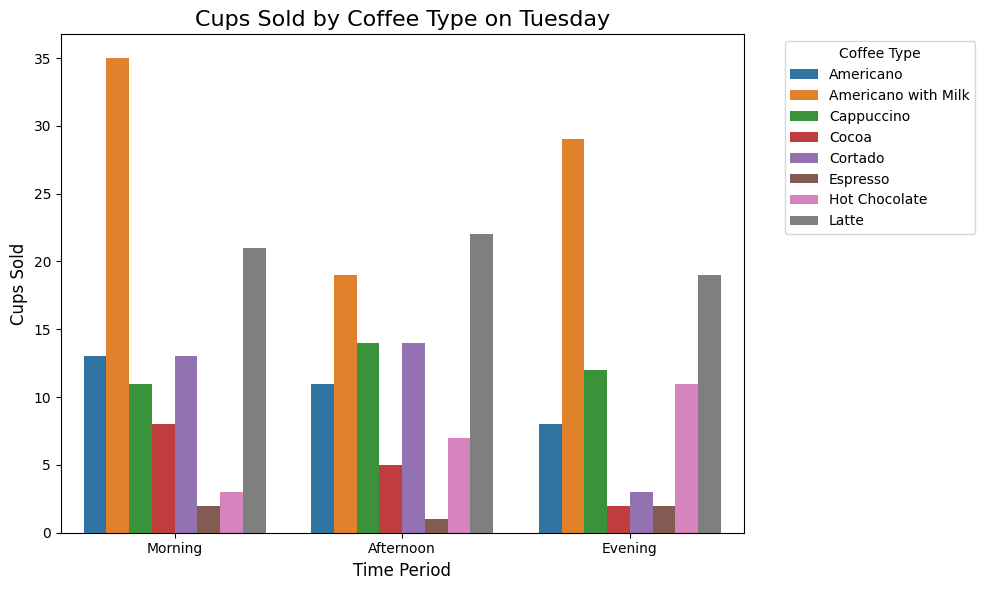

In [745]:
import seaborn as sns
import matplotlib.pyplot as plt

monday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Tuesday']

monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
monday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=monday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Tuesday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1145/3210752793.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


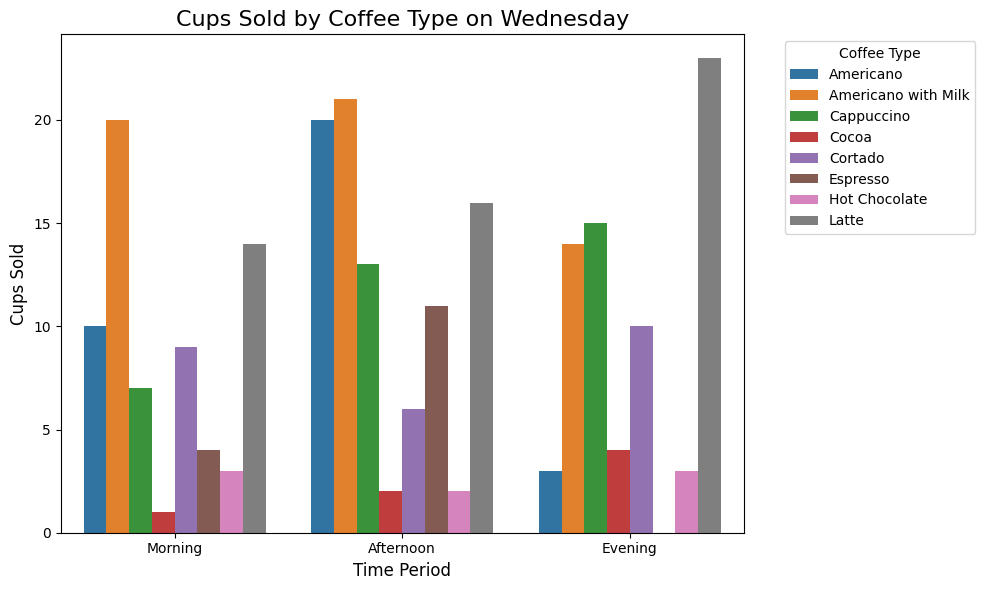

In [746]:
import seaborn as sns
import matplotlib.pyplot as plt

monday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Wednesday']

monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
monday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=monday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Wednesday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1145/1240440100.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


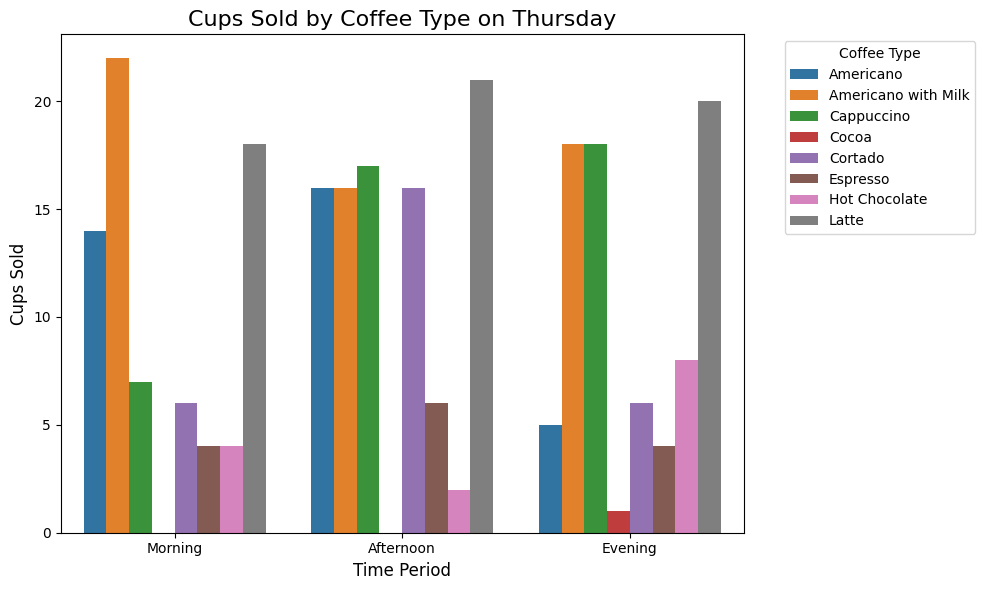

In [747]:
import seaborn as sns
import matplotlib.pyplot as plt

monday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Thursday']

monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
monday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=monday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Thursday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1145/4046644448.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


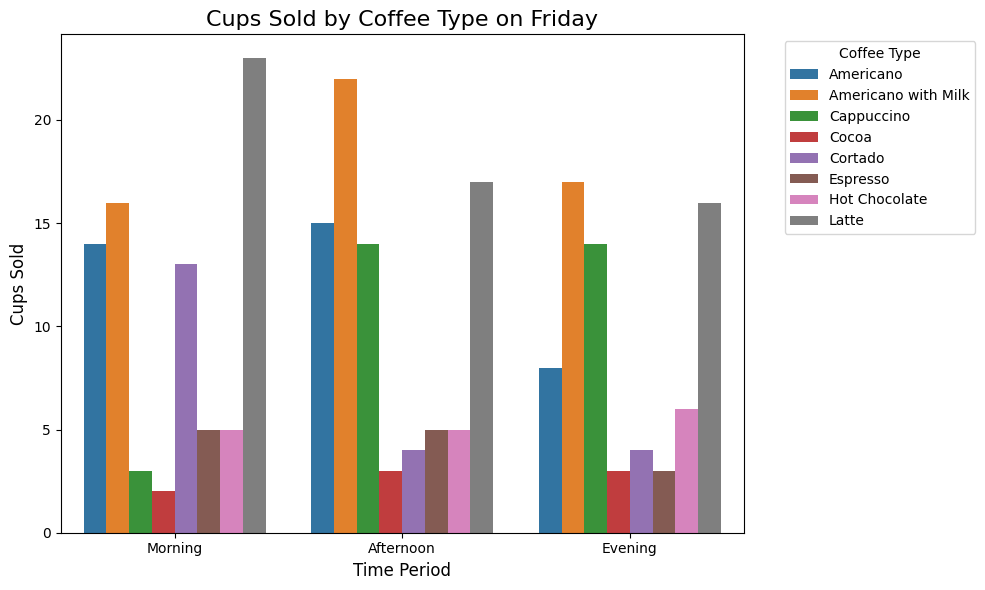

In [748]:
import seaborn as sns
import matplotlib.pyplot as plt

monday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Friday']

monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
monday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=monday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Friday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1145/1495262524.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


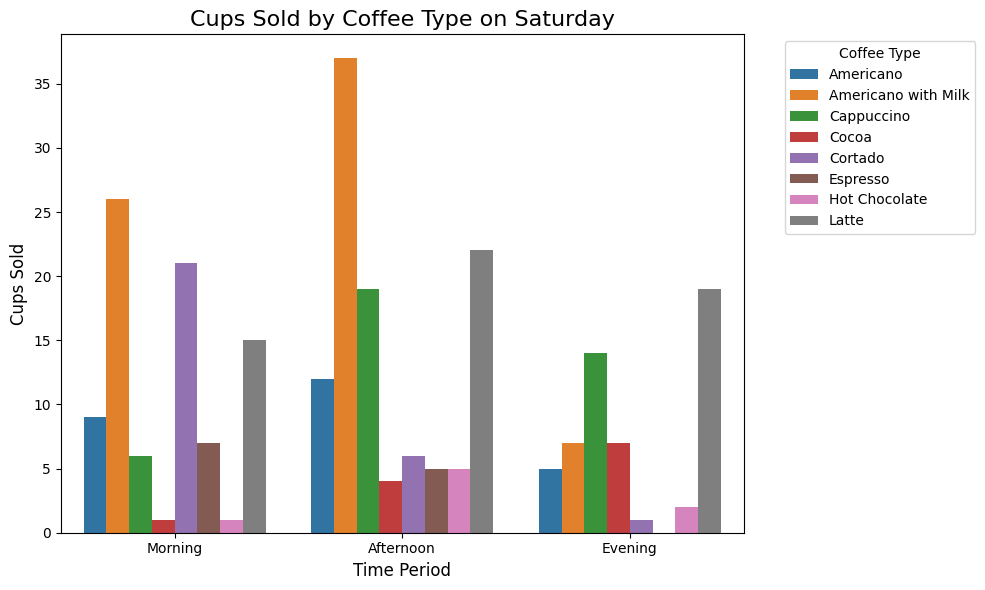

In [749]:
import seaborn as sns
import matplotlib.pyplot as plt

monday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Saturday']

monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
monday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=monday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Saturday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1145/3519661582.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


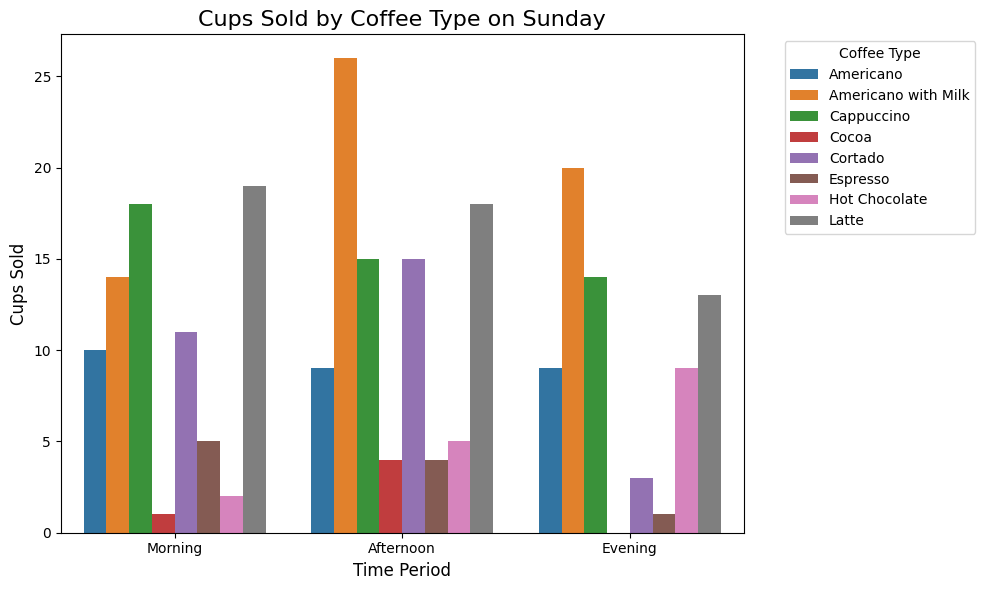

In [750]:
import seaborn as sns
import matplotlib.pyplot as plt

monday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Sunday']

monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
monday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=monday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Sunday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

จำนวนคนที่มาซื้อซ้ำ

In [751]:
countCard = coff2[coff2['cash_type'] == 'card'].shape[0]
countCash = coff2[coff2['cash_type'] == 'cash'].shape[0]
duplicate_customers = coff2['card'].value_counts()
# print(duplicate_customers).
# หาผู้ที่มาซ้ำ (คนที่ซื้ออย่างน้อย 2 ครั้ง)
repeat_customers = duplicate_customers[duplicate_customers > 1]
notrepeat_customers = duplicate_customers[duplicate_customers == 1]
# นับจำนวนคนที่มาซื้อกาแฟซ้ำ
num_repeat_customers = len(repeat_customers)
num_notrepeat_customers = len(notrepeat_customers)

#
repeat_customers = coff2[coff2['card'].isin(duplicate_customers[duplicate_customers > 1].index)]
# Step 2: จัดกลุ่มตาม 'card' และนับจำนวนรายการที่ซื้อ
purchase_counts = repeat_customers.groupby('card').size().reset_index(name='purchase_count')
# หากต้องการนับจำนวนลูกค้าในแต่ละจำนวนรายการที่ซื้อ
counts_per_customer = purchase_counts['purchase_count'].value_counts().sort_index()
hi2 = purchase_counts['purchase_count'].sum()


print(f"รายการทั้งหมด {coff2.shape[0]} ราบการ")
print(f"เฉพาะคนที่จ่ายด้วยบัตร {countCard} รายการ \
\nซึ่งประกอบด้วยซื้อซ้ำ {hi2} รายการและไม่ซื้อซ้ำ {countCard - hi2} รายการ" )
print(f"เฉพาะคนที่จ่ายด้วยเงินสด {countCash} รายการ")

print(f"จำนวนคนซื้อซ้ำ {num_repeat_customers + num_notrepeat_customers} คน")
print(f"จำนวนคนที่ซื้อซ้ำ : {num_repeat_customers} คน")
print(f"จำนวนคนที่ไม่ซื้อซ้ำ : {num_notrepeat_customers} คน")
print()
print(f"ในที่นี้ให้รายการสั่งซื้อด้วยเงินสด 1 รายการ = จำนวนคนที่ซื้อด้วยเงินสด 1 คน\
\nดังนั้นจำนวนคนที่ด้วยเงินสด: {countCash} คน")
print(f"รวมจำนวนคนทั้งสิ้น {num_repeat_customers + num_notrepeat_customers+ countCash} คน")

รายการทั้งหมด 1749 ราบการ
เฉพาะคนที่จ่ายด้วยบัตร 1660 รายการ 
ซึ่งประกอบด้วยซื้อซ้ำ 1236 รายการและไม่ซื้อซ้ำ 424 รายการ
เฉพาะคนที่จ่ายด้วยเงินสด 89 รายการ
จำนวนคนซื้อซ้ำ 695 คน
จำนวนคนที่ซื้อซ้ำ : 271 คน
จำนวนคนที่ไม่ซื้อซ้ำ : 424 คน

ในที่นี้ให้รายการสั่งซื้อด้วยเงินสด 1 รายการ = จำนวนคนที่ซื้อด้วยเงินสด 1 คน
ดังนั้นจำนวนคนที่ด้วยเงินสด: 89 คน
รวมจำนวนคนทั้งสิ้น 784 คน


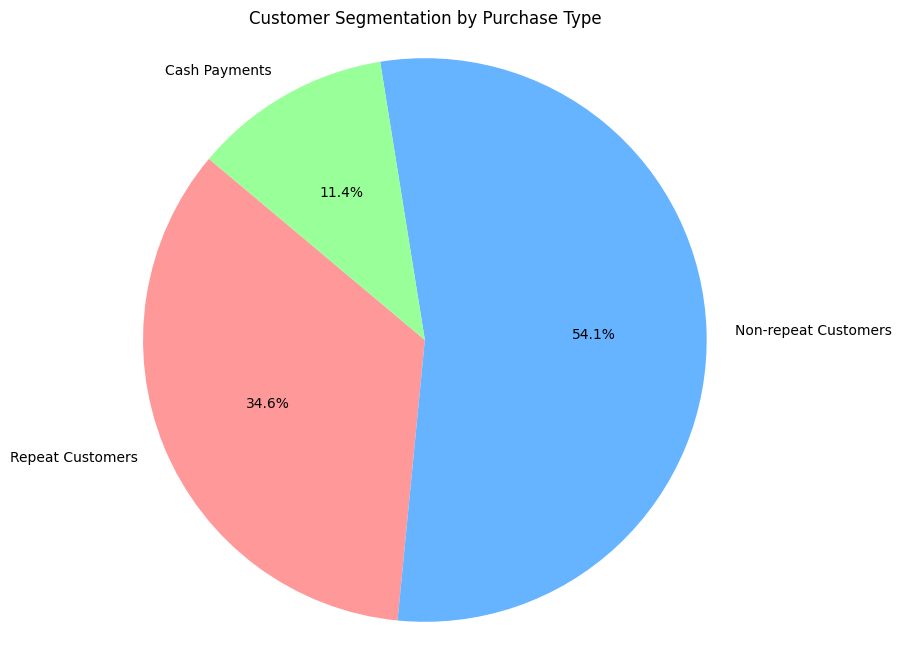

In [752]:
# กำหนดค่าที่ต้องการแสดงในกราฟ
labels = ['Repeat Customers', 'Non-repeat Customers', 'Cash Payments']
sizes = [num_repeat_customers, num_notrepeat_customers, countCash]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # กำหนดสีสำหรับแต่ละส่วน

# สร้างกราฟวงกลม
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # ทำให้กราฟเป็นวงกลม

# ตั้งชื่อกราฟ
plt.title('Customer Segmentation by Purchase Type')

# แสดงกราฟ
plt.show()

แผนภูมิวงกลม ที่บอกคนซื้อซ้ำกับคนที่ไม่มาซื้อซ้ำ

In [753]:
# Step 1: กรองข้อมูลลูกค้าที่ซื้อซ้ำ
repeat_customers = coff2[coff2['card'].isin(duplicate_customers[duplicate_customers > 1].index)]
# Step 2: จัดกลุ่มตาม 'card' และนับจำนวนรายการที่ซื้อ
purchase_counts = repeat_customers.groupby('card').size().reset_index(name='purchase_count')
# หากต้องการนับจำนวนลูกค้าในแต่ละจำนวนรายการที่ซื้อ
counts_per_customer = purchase_counts['purchase_count'].value_counts().sort_index()
hi2 = purchase_counts['purchase_count'].sum()
print(f"รายการซื้อซ้ำ {hi2} รายการ")

print("จำนวนลูกค้าแต่ละกลุ่มที่ซื้อซ้ำดังนี้")
print(counts_per_customer)

รายการซื้อซ้ำ 1236 รายการ
จำนวนลูกค้าแต่ละกลุ่มที่ซื้อซ้ำดังนี้
purchase_count
2      153
3       43
4       20
5       17
6        7
7        6
8        4
9        1
10       2
11       2
12       4
13       3
14       1
17       1
21       1
27       1
36       1
41       1
58       1
67       1
101      1
Name: count, dtype: int64


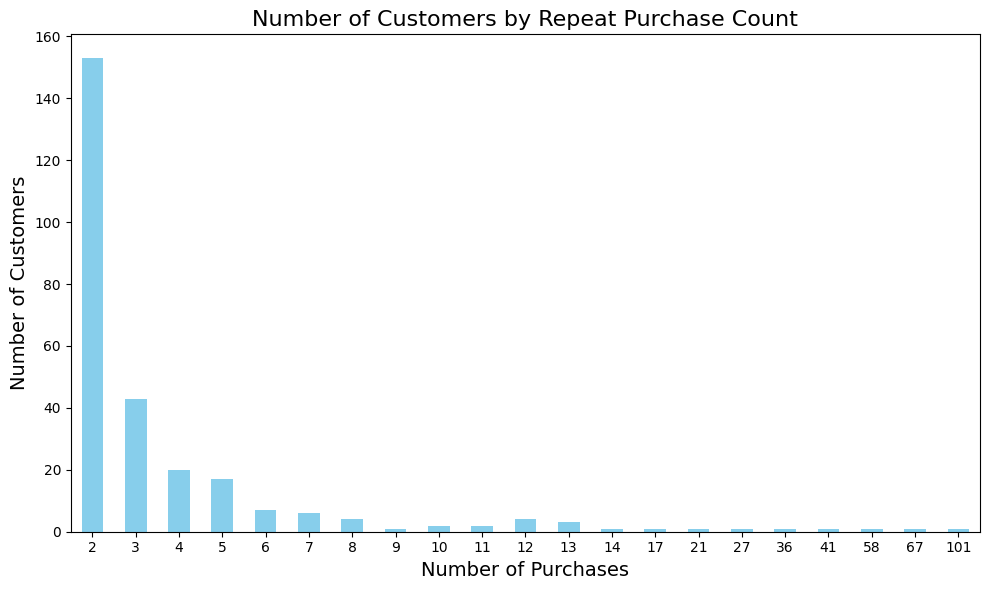

In [754]:
repeat_customers = coff2[coff2['card'].isin(duplicate_customers[duplicate_customers > 1].index)]

# Step 2: จัดกลุ่มตาม 'card' และนับจำนวนรายการที่ซื้อ
purchase_counts = repeat_customers.groupby('card').size().reset_index(name='purchase_count')

# หากต้องการนับจำนวนลูกค้าในแต่ละจำนวนรายการที่ซื้อ
counts_per_customer = purchase_counts['purchase_count'].value_counts().sort_index()

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
counts_per_customer.plot(kind='bar', color='skyblue')

# ตั้งชื่อกราฟและแกน
plt.title('Number of Customers by Repeat Purchase Count', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=0)  # หมุนป้ายแกน x ให้อยู่ในแนวตั้ง

# แสดงกราฟ
plt.tight_layout()
plt.show()

จากข้อมูลนี้ 
จำนวนคนซื้อซ้ำ 695 คน
จำนวนคนที่ซื้อซ้ำ : 271 คน
จำนวนคนที่ไม่ซื้อซ้ำ : 424 คน
สามารถสร้างกราฟได้ดังนี้


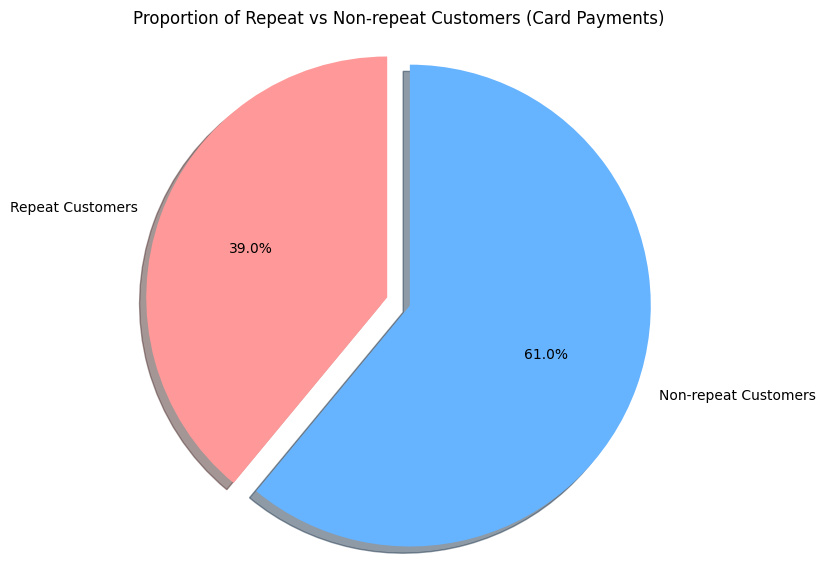

In [755]:
# Data for repeat and not repeat customers
print(f"จากข้อมูลนี้ \nจำนวนคนซื้อซ้ำ {num_repeat_customers + num_notrepeat_customers} คน")
print(f"จำนวนคนที่ซื้อซ้ำ : {num_repeat_customers} คน")
print(f"จำนวนคนที่ไม่ซื้อซ้ำ : {num_notrepeat_customers} คน")
print(f"สามารถสร้างกราฟได้ดังนี้")
labels = ['Repeat Customers', 'Non-repeat Customers']
sizes = [num_repeat_customers, num_notrepeat_customers]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode first slice (repeat customers)

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Repeat vs Non-repeat Customers (Card Payments)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [756]:
# หาลูกค้าที่ซื้อเพียงครั้งเดียว
customer_counts = coff2['card'].value_counts()

# กรองเฉพาะลูกค้าที่ซื้อครั้งเดียว
single_purchase_customers = customer_counts[customer_counts == 1].index

# กรองข้อมูลสำหรับลูกค้าที่ซื้อครั้งเดียว และดึงสินค้าที่พวกเขาซื้อไป
single_purchase_data = coff2[coff2['card'].isin(single_purchase_customers)]

# ตรวจสอบว่าลูกค้าที่ซื้อครั้งเดียวซื้อสินค้าอะไรบ้าง
items_purchased_by_single_purchase_customers = single_purchase_data['coffee_name'].value_counts()

print("สินค้าที่ลูกค้าที่ไม่ซื้อซ้ำซื้อไปมีดังนี้:")
print(items_purchased_by_single_purchase_customers)

สินค้าที่ลูกค้าที่ไม่ซื้อซ้ำซื้อไปมีดังนี้:
coffee_name
Latte                  102
Americano with Milk     98
Cappuccino              82
Americano               52
Cortado                 29
Hot Chocolate           26
Espresso                25
Cocoa                   10
Name: count, dtype: int64


/tmp/ipykernel_1145/1523014007.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items_purchased_by_single_purchase_customers.index,


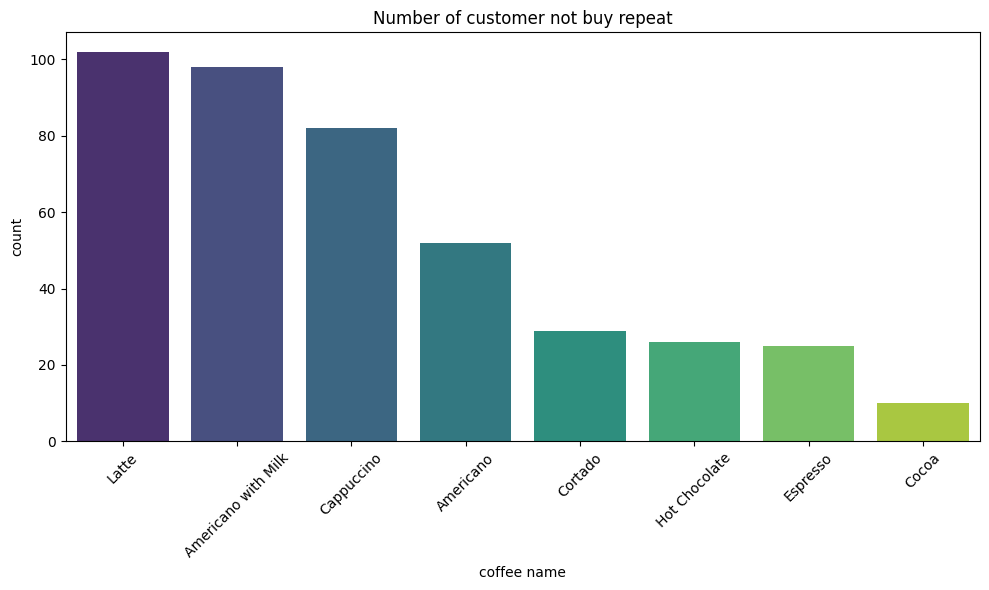

In [757]:
# หาลูกค้าที่ซื้อเพียงครั้งเดียว
customer_counts = coff2['card'].value_counts()

# กรองเฉพาะลูกค้าที่ซื้อครั้งเดียว
single_purchase_customers = customer_counts[customer_counts == 1].index

# กรองข้อมูลสำหรับลูกค้าที่ซื้อครั้งเดียว และดึงสินค้าที่พวกเขาซื้อไป
single_purchase_data = coff2[coff2['card'].isin(single_purchase_customers)]

# ตรวจสอบว่าลูกค้าที่ซื้อครั้งเดียวซื้อสินค้าอะไรบ้าง
items_purchased_by_single_purchase_customers = single_purchase_data['coffee_name'].value_counts()

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
sns.barplot(x=items_purchased_by_single_purchase_customers.index,
            y=items_purchased_by_single_purchase_customers.values, palette='viridis')

# ตั้งชื่อกราฟ
plt.title('Number of customer not buy repeat')
plt.xlabel('coffee name')
plt.ylabel('count')

# แสดงกราฟ
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [758]:
from statsmodels.tsa.arima.model import ARIMA

# Filter for Latte sales
latte_sales = daily_sales[daily_sales['coffee_name'] == 'Latte'].set_index('date')['total_sales']

# Fit ARIMA model
arima_model = ARIMA(latte_sales, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast
forecast_1day = arima_fit.forecast(steps=1)
forecast_1week = arima_fit.forecast(steps=7)
forecast_1month = arima_fit.forecast(steps=30)

print("Forecast for 1 day:", forecast_1day)
print("Forecast for 1 week:", forecast_1week)
print("Forecast for 1 month:", forecast_1month)


NameError: name 'daily_sales' is not defined